<a href="https://colab.research.google.com/github/Chloe0704/Digits_Classification/blob/master/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification


## Key Evaluation Terms



*  [Amazon ML Key Classification Metrics](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html?icmpid=docs_machinelearning_console)
*  [sklearn classification metrics
](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)




*   **Precision**:  Measures the fraction of actual positives among those examples that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*  ** Recall**:  Measures the fraction of actual positives that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*   **F1-score**:  Weighted average of recall and precision


* **AUC**:  AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples

* **False Positive Rat**e:  The false positive rate (FPR) measures the false alarm rate or the fraction of actual negatives that are predicted as positive. The range is 0 to 1. A smaller value indicates better predictive accuracy





## Ingestion

In [0]:
from sklearn import datasets

# Use digits dataset from sklearn
digits = datasets.load_digits()

##EDA

In [0]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

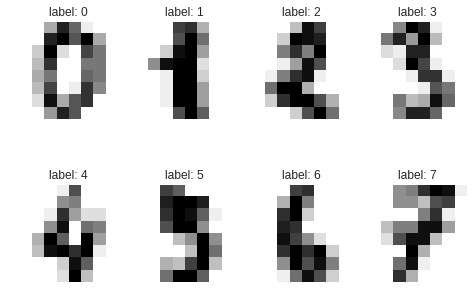

In [0]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label)

##Data Modeling

### Split data into train(80%) and test(20%)

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix


X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)


###SVC classification
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [0]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

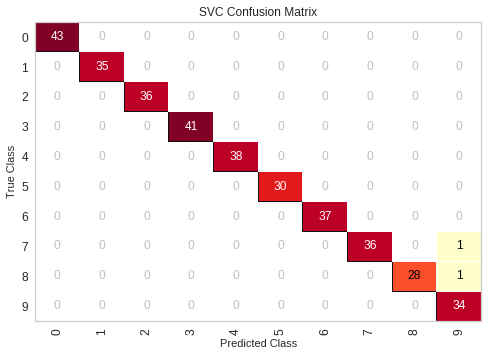

0.9944444444444445

In [0]:
n_samples = len(X_test)
t_samples = len(X_train)
data = X_test.reshape((n_samples, -1))
data_t = X_train.reshape((t_samples, -1))


classifier = svm.SVC(gamma=0.001)


cm = ConfusionMatrix(classifier, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(data_t, y_train)
y_pred = classifier.predict(data)


cm.score(X_test, y_test)
cm.poof()
classifier.score(X_test, y_test)

#Yellowbrick Confusion Matrix
#http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html


In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      1.00      0.97        34

   micro avg       0.99      0.99      0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99 

### Random forest classification

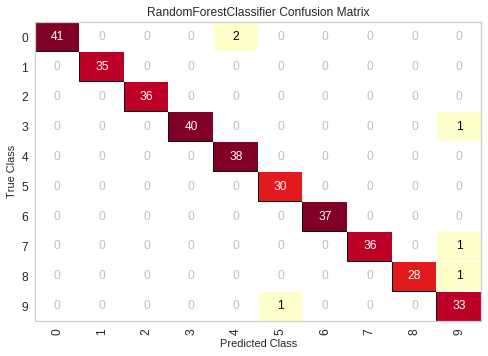

0.9833333333333333

In [0]:
from sklearn.ensemble import RandomForestClassifier
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)



rf0 = RandomForestClassifier(n_estimators= 100, oob_score=True, random_state=10)
model0 = rf0.fit(X_train, y_train)
y_predrf = rf0.predict(X_test)


cm = ConfusionMatrix(rf0, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()
rf0.score(X_test, y_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (rf0, metrics.classification_report(y_test, y_predrf)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           

### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


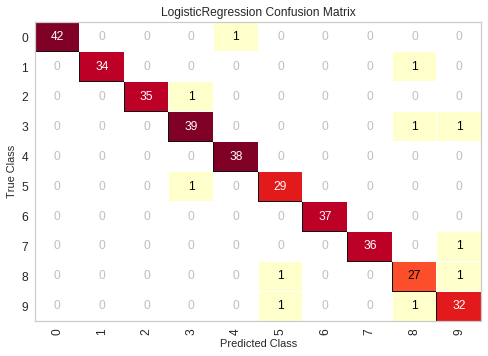

0.9694444444444444

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X_train, y_train)
y_predlg = model.predict(X_test)

cm.score(X_test, y_test)
cm.poof()
model.score(X_test, y_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_predlg)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.91      0.94      0.93        34

   micro avg       0.97      0.97      0.97       360
   macro avg       0.97      0.97      0.97     

### ROCAUC

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html


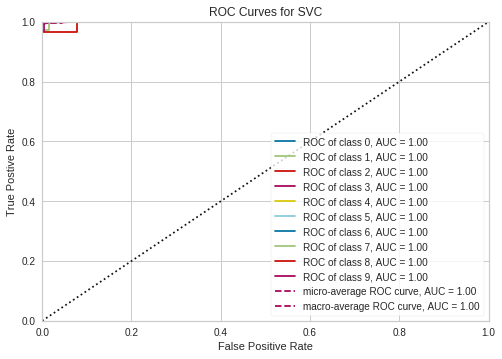

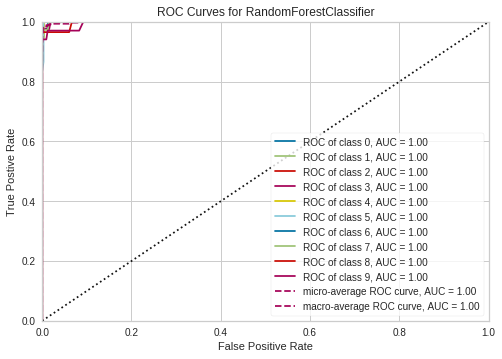

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


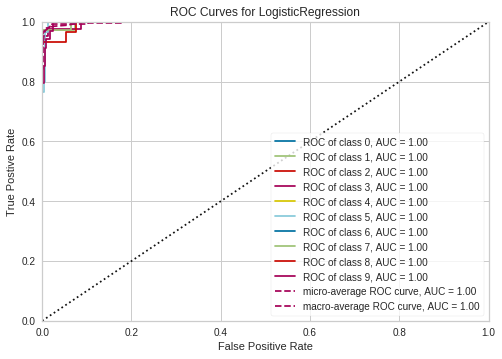

In [0]:
from yellowbrick.classifier import ROCAUC
classes=[0,1,2,3,4,5,6,7,8,9]

# Instantiate the visualizer with the SVC classification model
visualizer = ROCAUC(classifier, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Instantiate the visualizer with the RF classification model
visualizer = ROCAUC(rf0, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()             

# Instantiate the visualizer with the logistic regression model
visualizer = ROCAUC(model, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()             

##Conclusion

* Overall, the three models (SVC, Random Forest and Logistic Regression) perform well on predicting handwritting numbers with overall assess score higher than 0.97;
*   With the same testing and traning data, the overall performance of model SVC, Random Forest and Logistic Regression is decresing in sequence;
*   No matter in which model, the number 9 has reletively lower scores and can easily be comfused with other digits, while number 6 is the easist to recognize in the three models. 

